# Doctor's Consultation Fee Study:

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [4]:
df_test=pd.read_excel(r"C:\Users\USER\AppData\Local\Temp\Temp2_Doctor_fee_consultation.zip\Final Participant Data Folder\Final_Test.xlsx")

# testing dataset

In [5]:
df_test
df_test["source"]= "Test"

In [6]:
df_train=pd.read_excel(r"C:\Users\USER\AppData\Local\Temp\Temp2_Doctor_fee_consultation.zip\Final Participant Data Folder\Final_Train.xlsx")

#training dataset

In [7]:
df_train
df_train["source"]= "Train"


In [8]:
# concat the testin and trained data:

df=pd.concat([df_train,df_test],ignore_index=True)

In [9]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,Test
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,Test
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,Test
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,Test


so now we have 7948 rows and 8 columns. I create one new column. In that column train and test rows are mentioned

In [10]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

Here we can see that nan value present in the four columns.

In [11]:
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

Most of the columns are object type. so need to convert

In [12]:
# lets check unique value
df.apply(lambda x: len(x.unique()))

Qualification         1801
Experience              64
Rating                  53
Place                  949
Profile                  6
Miscellaneous_Info    3981
Fees                    41
source                   2
dtype: int64

most of the unique value present in profile column

In [13]:
df["Experience"]=df["Experience"].str.strip("years experience")

In [14]:
df["Experience"]=df["Experience"].astype(int)

Experience column we drop years experience using strip for changing object type of data. 

In [15]:
df.dtypes

Qualification          object
Experience              int32
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

experence column change to integer.Lets try to change other column

missing value:

In [16]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [17]:
def changequali(x):
    a=x.split(' ')
    b=x.split(',')
    if ',' not in x:
        return a[0]
    else:
        return b[0]

In [18]:
def removebar(x):
    c=x.split('-')
    if '-' in x:
        return c[0]
    else:
        return x
    

In [19]:
df['Qualification']=df['Qualification'].apply(changequali)

In [20]:
df['Qualification']=df['Qualification'].apply(removebar)

In [21]:
pd.set_option('display.max_rows',None)
df["Qualification"].value_counts()

MBBS                                                                   3313
BDS                                                                    1579
BAMS                                                                    939
BHMS                                                                    938
MD                                                                      338
MDS                                                                     169
MS                                                                      120
MD                                                                       81
MDS                                                                      59
DNB                                                                      50
DDVL                                                                     33
Get                                                                      30
MS                                                                       26
DHMS        

for the simplificstion we can categories the qualification into multiple

In [22]:
def multi(x):
    a=x.strip('.')
    b=a.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in b:
        return 'BSC'
    elif mylist[1] in b:
        return 'Diploma'
    elif mylist[2] in b:
        return 'Certification'
    elif mylist[3] in b:
        return 'PhD'
    else:
        return x
    

In [23]:
df["Qualification"]=df["Qualification"].apply(multi)

In [24]:
df["Qualification"].value_counts()

MBBS                                             3313
BDS                                              1579
BAMS                                              939
BHMS                                              938
MD                                                338
MDS                                               169
MS                                                120
MD                                                 81
Diploma                                            72
MDS                                                59
DNB                                                50
DDVL                                               33
Get                                                30
MS                                                 26
DHMS                                               25
LCEH                                               19
B.Sc                                               15
Certification                                      10
PhD                         

In [25]:
df["Fees"].max()

950.0

950 is the highest fee charged by dorctor

In [26]:
df[df["Fees"]==950]

,Qualification,Experience,Rating,Place,Profile,Fees,source
293,MBBS,29,100%,"Adyar, Chennai",General Medicine,950.0,Train


100% rating was given to the doctor and has 29 yrs experience

In [27]:
# Lets check how mush dr has charged above 800 fees
df[df["Fees"]>800]

,Qualification,Experience,Rating,Place,Profile,Fees,source
275,MD,6,NaN,"Chanakyapuri, Delhi",Dermatologists,900.0,Train
293,MBBS,29,100%,"Adyar, Chennai",General Medicine,950.0,Train
987,MBBS,25,93%,"Shalimar Bagh, Delhi",ENT Specialist,900.0,Train
1314,MBBS,33,100%,"Mira-Bhayandar Road, Mumbai",General Medicine,900.0,Train
1631,MBBS,6,NaN,"Kandivali West, Mumbai",Dermatologists,900.0,Train
2165,MBBS,8,100%,"Kandivali West, Mumbai",General Medicine,900.0,Train
2252,MBBS,46,95%,"Richmond Town, Bangalore",ENT Specialist,900.0,Train
2393,BHMS,19,100%,"Mulund West, Mumbai",Homeopath,900.0,Train
2428,MA,6,NaN,"Vasant Kunj, Delhi",Homeopath,900.0,Train
2522,BHMS,27,98%,"Mulund West, Mumbai",Homeopath,900.0,Train


There are 22 dr has above 800

In [28]:
df[df['Fees']>800]['Profile'].value_counts()

General Medicine    7
Dermatologists      5
Homeopath           4
ENT Specialist      3
Ayurveda            1
Dentist             1
Name: Profile, dtype: int64

General Medicin Dr are highest in this above 800 charged catogories.

In [29]:
df["Fees"].min()

5.0

In [30]:
df[df["Fees"]==5]

,Qualification,Experience,Rating,Place,Profile,Fees,source
1930,BDS,6,NaN,"TV Medical College, Thiruvananthapuram",Dentist,5.0,Train


Dentist is the least fees charged in the dataset

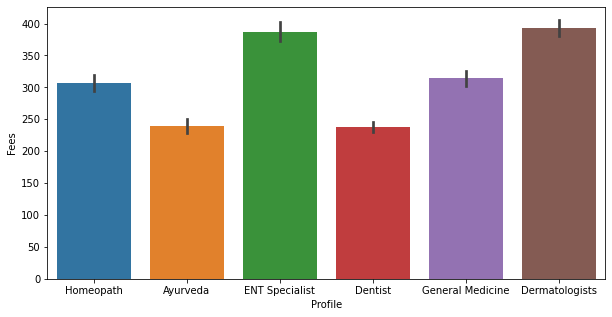

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y='Fees',data=df)
plt.show()

In [32]:
# make an instance for Rating which no null value raws
rate=df[df["Rating"].notnull()]

In [33]:
def remove(x):
    per=x.split('%')
    return per[0]

In [34]:
rate['Rating']=rate['Rating'].apply(remove)

In [35]:
rate["Rating"]=rate["Rating"].astype(float)

In [36]:
df.Profile.value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

lets group the data from profile and rating column based on criteria. after find mean

In [37]:
rate.groupby("Profile")["Rating"].mean()

Profile
Ayurveda            96.277108
Dentist             97.698454
Dermatologists      93.446281
ENT Specialist      88.973236
General Medicine    91.944238
Homeopath           96.524496
Name: Rating, dtype: float64

 Lets try to replace nan value in column Rating with this mean value

In [38]:
def filter_fun(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):
        
        if Profile == 'Ayurveda':
            return '96%'
        elif Profile == 'Dentist':
            return '98%'
        elif Profile == 'Dermatologist':
            return '93%'
        elif Profile == 'ENT Specialist':
            return '89%'
        elif Profile =='General Medicine':
            return '92%'
        elif Profile =='Homeopath':
            return '97%'
    else:
        return Rating
        

In [39]:
df['Rating'] =df[['Rating','Profile']].apply(filter_fun,axis=1)

In [40]:
df['Rating']=df["Rating"].str.strip("%")

In [41]:
df['Rating']= df['Rating'].astype(float)

In [42]:
def Placeexactly(x):
    wans=str(x).split(' ')
    return wans[-1]

In [43]:
plc=df[df["Place"].notnull()]

In [44]:
plc['Place']=plc["Place"].apply(Placeexactly)

In [45]:
plc["Place"].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: Place, dtype: int64

highest number of dr located in Bangalore. so let's fill it in the nan 

In [46]:
df["Place"].fillna('Basaveshwaranagar, Bangalore',inplace=True)

In [47]:
df["Place"]=df["Place"].apply(Placeexactly)

In [48]:
def remove_e(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [49]:
df['Place']=df['Place'].apply(remove_e)

In [50]:
df['Place'].value_counts()

Bangalore             1710
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Name: Place, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Experience     7948 non-null   int32  
 2   Rating         7422 non-null   float64
 3   Place          7948 non-null   object 
 4   Profile        7948 non-null   object 
 5   Fees           5961 non-null   float64
 6   source         7948 non-null   object 
dtypes: float64(2), int32(1), object(4)
memory usage: 403.7+ KB


# converting categorical variable into numbers

In [52]:
df[df['Rating']<50]

,Qualification,Experience,Rating,Place,Profile,Fees,source
55,MBBS,25,36.0,Bangalore,ENT Specialist,600.0,Train
692,MBBS,29,33.0,Delhi,Dermatologists,500.0,Train
911,Diploma,31,45.0,Mumbai,Homeopath,500.0,Train
2585,MRCPCH (UK),19,7.0,Hyderabad,General Medicine,100.0,Train
3126,MBBS,38,48.0,Delhi,ENT Specialist,800.0,Train
3604,MBBS,33,40.0,Chennai,General Medicine,700.0,Train
5028,MBBS,30,47.0,Bangalore,ENT Specialist,650.0,Train
5127,MBBS,19,33.0,Bangalore,ENT Specialist,650.0,Train


In [53]:
def col(x):
    if x<=50:
        return 1
    if x>50:
        return 2

In [54]:
df["Rating"]=df["Rating"].apply(col)

categorise the Rating column above 50% and below because maximum rating is 100

In [55]:
df["Rating"].value_counts(normalize=True)

2.0    0.998922
1.0    0.001078
Name: Rating, dtype: float64

In [56]:
df["Rating"].fillna(0,inplace=True)

In [57]:
df["Experience"].max()

66

In [58]:
def col(x):
    if x<=33:
        return 1
    if x>33:
        return 2

In [59]:
df["Experience"]=df["Experience"].apply(col)

In [60]:
df["Experience"].value_counts(normalize=True)

1    0.886387
2    0.113613
Name: Experience, dtype: float64

Experience column also divided 1 and 2 on the basis of maximum Experience

In [61]:
place=df.groupby("Place")["Fees"].mean()

In [62]:
df["Place"]=df["Place"].map(place)

In [63]:
profile=df.groupby("Profile")["Fees"].mean()

In [64]:
df["Profile"]=df["Profile"].map(profile)

In [65]:
qualification=df.groupby("Qualification")["Fees"].mean()

In [66]:
df["Qualification"]=df["Qualification"].map(qualification)

In [84]:
df["Qualification"]=df["Qualification"].fillna(0)

In [85]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,301.500000,1,2.0,188.431373,306.499407,100.0,Train
1,234.457103,1,2.0,324.364486,238.968193,350.0,Train
2,358.261846,1,2.0,324.364486,387.321429,300.0,Train
3,175.000000,1,2.0,324.364486,238.968193,250.0,Train
4,234.457103,1,2.0,283.602339,238.968193,250.0,Train


In [86]:
df_train=df.loc[df["source"]=='Train']
df_test=df.loc[df["source"]=='Test']

In [87]:
df_test.reset_index(drop=True,inplace=True)

In [88]:
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [89]:
df_x=df_train.drop(columns=["Fees"])
y=df_train[["Fees"]]

In [90]:
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [91]:
max_r_score=0
def maxr2(regr,df_x,y):
    for r_state in range(42,62):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr = RandomForestRegressor()
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [92]:
rf=RandomForestRegressor()
parameter = {'max_depth':[25,50,75],
            "min_samples_split": [0.01,0.05,0.1],
            "max_leaf_nodes": [300,900,1200],
            "n_estimators":[200]}

grid_search = GridSearchCV(rf,param_grid=parameter,cv=5,scoring='r2')
grid_search.fit(df_x,y)
grid_search.best_params_

{'max_depth': 75,
 'max_leaf_nodes': 1200,
 'min_samples_split': 0.05,
 'n_estimators': 200}

In [93]:
df_x.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile'], dtype='object')

In [94]:

max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test= train_test_split(x, y,random_state = r_state,test_size=0.20)
    rf_model=RandomForestRegressor(max_depth=50,max_leaf_nodes=900,min_samples_split=0.05,n_estimators=200)
    rf_model.fit(x_train,y_train)                                  
    y_pred=rf_model.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to",r_state,"is",r2_scr)
    if r2_scr > max_r_score:
        max_r_score=r2_scr    
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state," is",max_r_score)

r2 score corresponding to 42 is 0.2035278337812686
r2 score corresponding to 43 is 0.19587855157943923
r2 score corresponding to 44 is 0.2149324117697845
r2 score corresponding to 45 is 0.18109612094802519
r2 score corresponding to 46 is 0.16502147722199612
r2 score corresponding to 47 is 0.1674086082261984
r2 score corresponding to 48 is 0.1922217944970307
r2 score corresponding to 49 is 0.19796920813873098
r2 score corresponding to 50 is 0.19875359481610555
r2 score corresponding to 51 is 0.17813460731703978
r2 score corresponding to 52 is 0.15252716732090732
r2 score corresponding to 53 is 0.19428097182053117
r2 score corresponding to 54 is 0.16624745855819467
r2 score corresponding to 55 is 0.15979194269832975
r2 score corresponding to 56 is 0.19246292689464495
r2 score corresponding to 57 is 0.18648542858539152
r2 score corresponding to 58 is 0.13615718984057312
r2 score corresponding to 59 is 0.18798658562739812
r2 score corresponding to 60 is 0.20302290616744345
r2 score corresp

In [95]:
x_train,x_test,y_train,y_test = train_test_split(df_x,y,random_state=44,test_size=.20)
model=RandomForestRegressor(max_depth=50,max_leaf_nodes=900,min_samples_split=0.05,n_estimators=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("r2 score is ",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.21541149575276763
RMSE: 171.96365488476184


In [96]:
gb=GradientBoostingRegressor()
parameter = {"learning_rate": [0.01,0.05,0.1],
            "min_samples_split": [300,600,900],
            "n_estimators":[250]}

grid_search = GridSearchCV(gb,param_grid=parameter,cv=5,scoring='r2')
grid_search.fit(df_x,y)
grid_search.best_params_

{'learning_rate': 0.05, 'min_samples_split': 300, 'n_estimators': 250}

In [97]:
model_new=GradientBoostingRegressor(learning_rate=0.05,min_samples_split=300,n_estimators=250)
model_new.fit(x_train,y_train)
y_pred=model_new.predict(x_test)
print("r2 score is ",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.23169074244814414
RMSE: 170.17028638362416


GradientBoostingRegressor is final model.Let's apply model on the test set

In [100]:
df_test["Fees"]=df_test["Fees"].fillna(0)

In [ ]:
fee_pred=model_new.predict(df_test)

In [ ]:
fee_pred=pd.DataFrame(fee_pred,columns=["fees"])

make it as a dataframe

# save

In [103]:
import joblib
joblib.dump(model_new,"boosting.pkl")

['boosting.pkl']